<a href="https://colab.research.google.com/github/Vaddisaimanikanta/Number-detection-/blob/main/MNIST_Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libraries**


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import cv2
from google.colab.patches import cv2_imshow
np.random.seed(0)

**Import Dataset**


In [ ]:
from keras.datasets import mnist

In [ ]:
#get the data and preprocessing

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## **Visualize examples**

In [ ]:
def plot_input_img(i):

  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

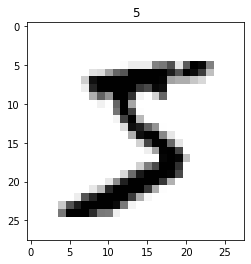

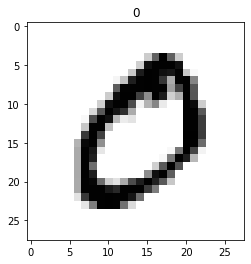

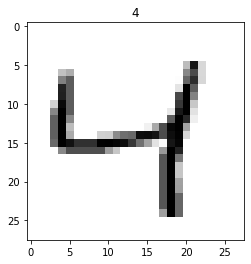

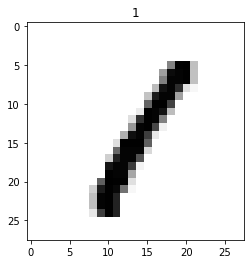

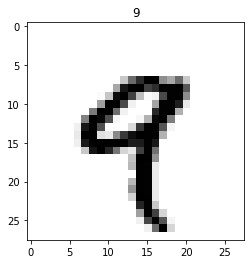

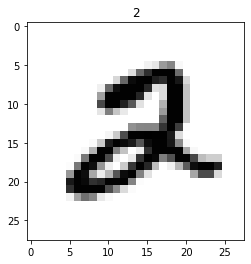

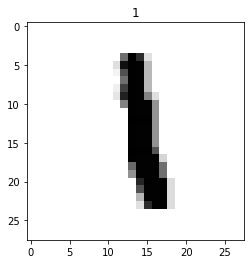

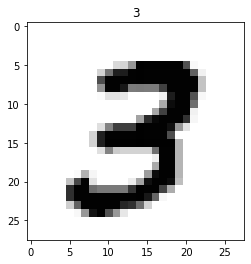

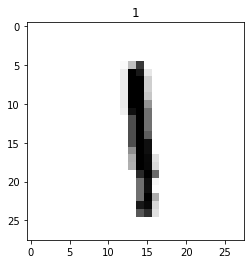

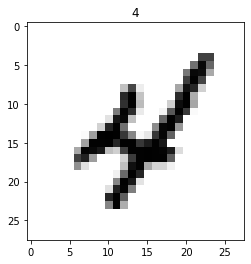

In [ ]:
for i in range(10):
  plot_input_img(i)

In [ ]:
# training values of variable y
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
# categorical values of y_train
for i in range(10):
  print(keras.utils.to_categorical(y_train[i]))

[0. 0. 0. 0. 0. 1.]
[1.]
[0. 0. 0. 0. 1.]
[0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1.]
[0. 1.]
[0. 0. 0. 1.]
[0. 1.]
[0. 0. 0. 0. 1.]


In [ ]:
print(X_train[10].shape)

(28, 28)


## **Preprocess the images**

In [ ]:
#Normalizing the image to [0,1] range

X_train = X_train.astype(np.float32)/225
X_test = X_test.astype(np.float32)/225


#Convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape

(60000, 28, 28)

### **Building the Neural Network**

In [ ]:
#setting up the layers of the Neural  Network
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1) , activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation ='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
# compiling the Neural Network
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# training the Neural Network
his = model.fit(X_train, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 58s 43ms/step - loss: 0.2084 - accuracy: 0.9386 - val_loss: 0.0811 - val_accuracy: 0.9749
Epoch 2/50
1313/1313 [==============================] - 48s 36ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0544 - val_accuracy: 0.9839
Epoch 3/50
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 4/50
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0477 - val_accuracy: 0.9848
Epoch 5/50
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0443 - val_accuracy: 0.9859
Epoch 6/50
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 7/50
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0277 - accuracy: 0.9907 - val_loss: 0.0399 -

In [ ]:
print("The model has successfully trained")

The model has successfully trained



 **Training data accuracy = 99.0%**

**Accuracy on Test data:**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.044100791215896606
Test accuracy: 0.9908999800682068


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.0441 - accuracy: 0.9909
0.9908999800682068


**Test data accuracy = 99.2%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


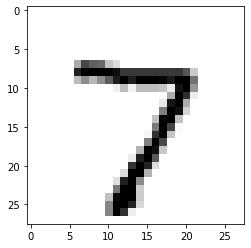

In [ ]:
# first data point in X_test
plt.imshow(X_test[0], cmap = 'binary')
plt.show()

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[3.64353244e-22 1.16042972e-26 3.74341791e-16 3.63969719e-15
 2.53445177e-30 1.99977533e-23 5.84558224e-37 9.99999940e-01
 4.24606749e-19 1.25379645e-17]


In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

#**Predictive system**

In [ ]:
def pred_img():
      input_image_path = input('Path of the image to be predicted: ')

      input_image = cv2.imread(input_image_path)

      cv2_imshow(input_image)

      grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

      input_image_resize = cv2.resize(grayscale, (28, 28))

      input_image_resize = input_image_resize/255

      image_reshaped = np.reshape(input_image_resize, [1,28,28])

      input_prediction = model.predict(image_reshaped)

      input_pred_label = np.argmax(input_prediction)

      print('The Handwritten Digit is recognised as ', input_pred_label)

*Giving digital images having my handwritten numbers as input to the model*

enter number of images need to be recognized2
Path of the image to be predicted: /content/zero.jpg


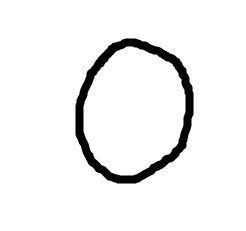

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  0
Path of the image to be predicted: /content/eight.jpg


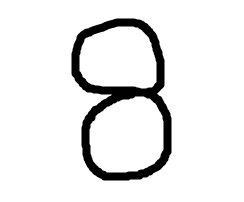

1/1 [==============================] - 0s 18ms/step
The Handwritten Digit is recognised as  8


In [ ]:
n=int(input("enter number of images need to be recognized"))
for i in range(n):
  pred_img()